In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt 

In [43]:
df = pd.read_csv('dataset/Severity_Clear_10to6.csv') # it is a performance data
df 

,date_time,host_ip,host_name,host_category,host_status,severity,CPU_load,CPU_Util,Mem_util,In_traffic,Out_traffic
0,2023-01-01 00:00:00,10.20.20.4,DQP_Server1,Server,Device Down,Critical,0,0,0,0,0
1,2023-01-01 01:00:00,10.20.20.4,DQP_Server1,Server,Device OK,Clear,9,9,9,9,9
2,2023-01-01 02:00:00,10.20.20.4,DQP_Server1,Server,Device OK,Clear,7,7,7,7,7
3,2023-01-01 03:00:00,10.20.20.4,DQP_Server1,Server,Device OK,Clear,5,5,5,5,5
4,2023-01-01 04:00:00,10.20.20.4,DQP_Server1,Server,Device OK,Clear,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...
17515,2023-12-31 19:00:00,10.20.20.1,DQP_Sw,Switch,Device OK,Clear,6,6,6,6,6
17516,2023-12-31 20:00:00,10.20.20.1,DQP_Sw,Switch,Device Down,Critical,0,0,0,0,0
17517,2023-12-31 21:00:00,10.20.20.1,DQP_Sw,Switch,Device OK,Clear,6,6,6,6,6
17518,2023-12-31 22:00:00,10.20.20.1,DQP_Sw,Switch,Device OK,Clear,6,6,6,6,6


10.20.20.4(Server or node) == DQP_Server1(host_name) 
10.20.20.1(Switch) == DQP_Sw(host_name) <----------- switch(Switch is used to connect multiple devices within the same network.)

1.Network Switch 
2.Core Switch 
3.Distribution Switch  

Performance Metrics: For a server, monitoring metrics like :---> 
	CPU_load, 
	CPU_Util, 
	Mem_util,
	Network traffic (In_traffic, Out_traffic) is essential to ensure it handles the required load efficiently.
	
Monitoring <host_status> and <severity> can help in quickly identifying and addressing security issues.

host_category: This categorizes the host based on its function or role within the network. Examples include web server, database server, application server, firewall, or router.

severity: This term indicates the importance or urgency of a particular event or issue. Severity levels often include informational, warning, critical, and fatal, helping prioritize responses based on the impact.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date_time      17520 non-null  object
 1   host_ip        17520 non-null  object
 2   host_name      17520 non-null  object
 3   host_category  17520 non-null  object
 4   host_status    17520 non-null  object
 5   severity       17520 non-null  object
 6   CPU_load       17520 non-null  int64 
 7   CPU_Util       17520 non-null  int64 
 8   Mem_util       17520 non-null  int64 
 9   In_traffic     17520 non-null  int64 
 10  Out_traffic    17520 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.5+ MB


In [45]:
df.columns

Index(['date_time', 'host_ip', 'host_name', 'host_category', 'host_status',
       'severity', 'CPU_load', 'CPU_Util', 'Mem_util', 'In_traffic',
       'Out_traffic'],
      dtype='object')

In [46]:
# np.random.seed(42)
# tf.random.set_seed(42)
 
# Load your dataset
# data = pd.read_csv('Severity_Clear_10to6.csv')
df = df[['date_time','CPU_load', 'CPU_Util', 'Mem_util', 'In_traffic', 'Out_traffic', 'host_ip', 'host_status']]
 
# Feature engineering and preprocessing
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time', inplace=True)
 
# Identify categorical columns (assuming they are of type 'object')
categorical_columns = df.select_dtypes(include=['object']).columns
 
# Apply label encoding to all categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
 
# List of features to scale
columns_to_scale = ['CPU_load', 'CPU_Util', 'Mem_util', 'In_traffic', 'Out_traffic']
 
# Normalize the df
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[columns_to_scale])
 
# Combine scaled numerical features with encoded categorical features
encoded_features = df[categorical_columns].values
combined_features = np.hstack((scaled_features, encoded_features))

/tmp/ipykernel_5017/292672301.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['date_time'])
/tmp/ipykernel_5017/292672301.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])


In [47]:
# Prepare the data for the CNN model
def create_sequences(data, labels, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append((data[i:i + window_size], labels[i + window_size]))
    return np.array(sequences)

In [49]:
window_size = 48
sequences = create_sequences(combined_features, df['host_status'].values, window_size)
X = np.array([seq[0] for seq in sequences])
y = np.array([seq[1] for seq in sequences])
 
# Ensure labels are integers (necessary for sparse_categorical_crossentropy)
y = y.astype(int)

/tmp/ipykernel_5017/959921812.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sequences)


In [23]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
 
# Ensure labels are integers (necessary for sparse_categorical_crossentropy)
y = y.astype(int)

# Split df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train

array([[[-1.00921127, -1.08556812, -1.09529539, ..., -1.09242194,
          1.        ,  0.        ],
        [-0.53766306, -0.55125553, -0.55082103, ..., -0.55039613,
          1.        ,  1.        ],
        [-0.64245155, -0.66999166, -0.67181533, ..., -0.67084631,
          1.        ,  1.        ],
        ...,
        [-0.74724004, -0.78872779, -0.79280964, ..., -0.79129649,
          1.        ,  1.        ],
        [-0.74724004, -0.78872779, -0.79280964, ..., -0.79129649,
          1.        ,  1.        ],
        [-0.48526881, -0.49188747, -0.49032388, ..., -0.49017104,
          1.        ,  1.        ]],

       [[-0.53766306, -0.55125553, -0.55082103, ..., -0.55039613,
          1.        ,  1.        ],
        [-0.64245155, -0.66999166, -0.67181533, ..., -0.67084631,
          1.        ,  1.        ],
        [-0.74724004, -0.78872779, -0.79280964, ..., -0.79129649,
          1.        ,  1.        ],
        ...,
        [-0.74724004, -0.78872779, -0.79280964, ..., -

In [51]:
 X.shape

(17472, 48, 7)

In [52]:
(window_size, X.shape[-1])

(48, 7)

In [53]:
num_classes = np.unique(y_train)
num_classes

array([0, 1, 2, 3, 4, 5, 6])

In [54]:
len(num_classes)

7

In [55]:
X.shape[1]

48

In [56]:
window_size

48

In [57]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Determine the number of classes
num_classes = len(np.unique(y_train))

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert class weights to a dictionary format required by Keras
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Define the LSTM model for multiclass classification
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, X.shape[-1]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model_lstm.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # metric to monitor
    patience=10,         # number of epochs with no improvement to stop training
    restore_best_weights=True  # restore the weights of the best epoch
)

# Train the LSTM model with class weights and EarlyStopping callback
history_lstm = model_lstm.fit(
    X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], class_weight=class_weights
)


Epoch 1/50
350/350 [==============================] - 11s 26ms/step - loss: 1.7711 - accuracy: 0.3340 - val_loss: 1.4844 - val_accuracy: 0.3720
Epoch 2/50
350/350 [==============================] - 9s 26ms/step - loss: 1.6223 - accuracy: 0.3685 - val_loss: 1.0708 - val_accuracy: 0.6699
Epoch 3/50
350/350 [==============================] - 9s 26ms/step - loss: 1.5367 - accuracy: 0.5627 - val_loss: 0.6768 - val_accuracy: 0.9077
Epoch 4/50
350/350 [==============================] - 9s 26ms/step - loss: 1.4580 - accuracy: 0.5727 - val_loss: 0.7074 - val_accuracy: 0.7203
Epoch 5/50
350/350 [==============================] - 9s 25ms/step - loss: 1.4128 - accuracy: 0.6194 - val_loss: 0.4424 - val_accuracy: 0.8401
Epoch 6/50
350/350 [==============================] - 9s 25ms/step - loss: 1.4020 - accuracy: 0.6419 - val_loss: 0.5487 - val_accuracy: 0.7961
Epoch 7/50
350/350 [==============================] - 9s 25ms/step - loss: 1.3705 - accuracy: 0.7169 - val_loss: 0.7672 - val_accuracy: 0.666

In [58]:
loss,accuracy = model_lstm.evaluate(X_test,y_test)# it returns the loss and accuracy
print(f'loss : {loss}',f'accuracy : {accuracy}',sep='\n')

110/110 [==============================] - 1s 7ms/step - loss: 0.1222 - accuracy: 0.9625
loss : 0.12217999994754791
accuracy : 0.9625178575515747


In [59]:
X_test.shape

(3495, 48, 7)

In [60]:
from sklearn.metrics import accuracy_score 
y_pred_prob = model_lstm.predict(X_test) # it returns the probability of the predicted classes
y_pred = np.argmax(y_pred_prob,axis=1) # it returns the index of the maximum value 
accu = accuracy_score(y_test,y_pred)
print(f'y_pred : {y_pred}',f'accuracy : {accu}',sep='\n')

110/110 [==============================] - 1s 7ms/step
y_pred : [1 1 1 ... 1 1 1]
accuracy : 0.9625178826895565


In [61]:
confusion_matrix(y_test, y_pred)

array([[ 146,    0,    0,    0,    0,    0,    0],
       [   0, 3201,    0,    1,    1,    0,    0],
       [   0,    0,    0,  100,    0,    0,    4],
       [   0,    0,    0,    7,    0,    0,    0],
       [   0,    0,    0,   15,    0,    0,    0],
       [   0,    0,    0,    5,    0,    0,    1],
       [   0,    0,    0,    4,    0,    0,   10]])

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00      3203
           2       0.00      0.00      0.00       104
           3       0.05      1.00      0.10         7
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         6
           6       0.67      0.71      0.69        14

    accuracy                           0.96      3495
   macro avg       0.39      0.53      0.40      3495
weighted avg       0.96      0.96      0.96      3495



/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- ***Why we choose the roc(Receiver Operating Characteristic) curve***
- to choose the threshold value. like 0.5 ,0.75 or any other value. 


In [63]:
'''This score helps in understanding how well the model distinguishes between different classes.
multi_class='ovo': Stands for "one-vs-one". This parameter is used when dealing with multi-class 
classification problems. The ROC AUC(Area Under the Curve) score is computed for each pair of classes, treating each 
pair as a binary classification problem. The final score is the average of all these pairwise 
scores.

average='macro': This parameter specifies how to average the scores for multi-class classification.
The 'macro' averaging computes the score for each class independently and then takes the average.
It does not take class imbalance into account, treating all classes equally.'''

roc_auc_lstm = roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='macro') # ye ek matra esa score hai jo kabhi change nhi hota hai bhale hi threshold ki value 0.5 se idhar-udhar kroge to confusion-matrix change ho jayega jisse accuracy score change ho jaayega but ye change nhi hota hai 
roc_auc_lstm
 

0.7775272337985487

In [64]:
precision_lstm, recall_lstm, f1_lstm, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
sensitivity_lstm = recall_lstm
 
print(f"Sensitivity: {sensitivity_lstm}")
print(f"F1 Score: {f1_lstm}")

Sensitivity: 0.5305230428106303
F1 Score: 0.3985803274378186


/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


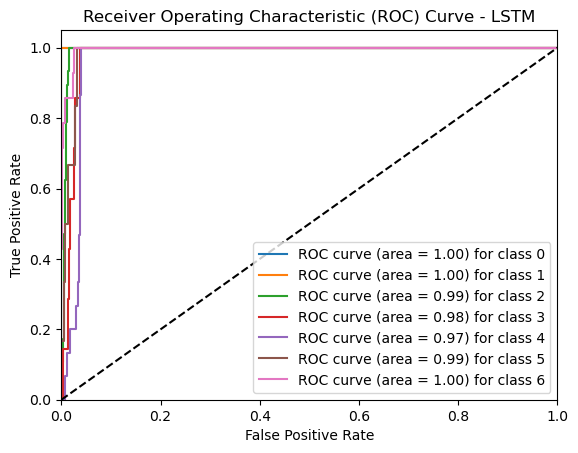

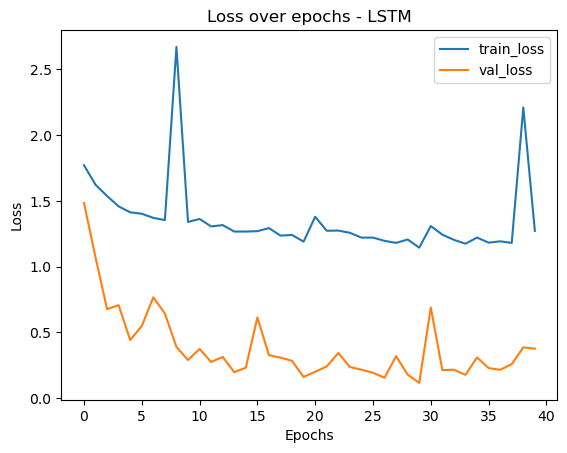

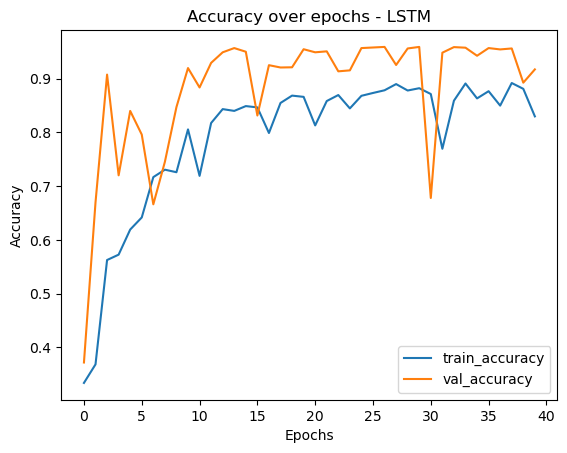

In [65]:
# Plot ROC Curve for each class
fpr_lstm = {}
tpr_lstm = {}
roc_auc_lstm = {}
for i in range(num_classes):
    fpr_lstm[i], tpr_lstm[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc_lstm[i] = auc(fpr_lstm[i], tpr_lstm[i])
 
plt.figure()
for i in range(num_classes):
    plt.plot(fpr_lstm[i], tpr_lstm[i], label=f'ROC curve (area = {roc_auc_lstm[i]:0.2f}) for class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LSTM')
plt.legend(loc='lower right')
plt.show()
 
# Plot loss and accuracy over epochs
plt.figure()
plt.plot(history_lstm.history['loss'], label='train_loss')
plt.plot(history_lstm.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs - LSTM')
plt.legend()
plt.show()
 
plt.figure()
plt.plot(history_lstm.history['accuracy'], label='train_accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs - LSTM')
plt.legend()
plt.show()

In [67]:

model_lstm.save('lstm_model.h5')
 
# Generate predictions for the next 48 time steps
num_predictions = 48
last_window = df[-window_size:]  # Get the last 'window_size' rows
 
predictions_lstm = []
predicted_features_lstm = []
 
for _ in range(num_predictions):
    # Predict next value
    prediction_lstm = model_lstm.predict(last_window[np.newaxis, :, :])
    predicted_class_lstm = np.argmax(prediction_lstm, axis=1)  # Get predicted class
    predictions_lstm.append(predicted_class_lstm[0])
    # Approximate new feature values for the new time step
    new_feature_row_lstm = np.random.randn(len(columns_to_scale))  # Assuming normal distribution for simplicity
    encoded_categorical_values = np.random.randint(0, np.max(encoded_features, axis=0), size=encoded_features.shape[1])
    new_combined_features = np.hstack((new_feature_row_lstm, encoded_categorical_values))
    predicted_features_lstm.append(new_combined_features)
    # Update the window with the new prediction and feature values
    last_window = np.vstack([last_window[1:], new_combined_features])  # Slide window
 
# Convert predictions back to original labels
predicted_labels_lstm = label_encoders['host_status'].inverse_transform(predictions_lstm)
 
# Separate the scaled numerical and encoded categorical features
predicted_features_lstm = np.array(predicted_features_lstm)
predicted_numerical_features_lstm = predicted_features_lstm[:, :len(columns_to_scale)]
predicted_categorical_features_lstm = predicted_features_lstm[:, len(columns_to_scale):]
 
# Convert scaled predicted numerical features back to original scale
predicted_numerical_original_scale_lstm = scaler.inverse_transform(predicted_numerical_features_lstm)
 
# Create a DataFrame for the next 48 time steps
future_dates_lstm = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=num_predictions, freq='H')
predicted_df_lstm = pd.DataFrame(predicted_numerical_original_scale_lstm, columns=columns_to_scale, index=future_dates_lstm)
 
# Revert the label-encoded categorical columns back to their original form
for i, column in enumerate(categorical_columns):
    predicted_df_lstm[column] = label_encoders[column].inverse_transform(predicted_categorical_features_lstm[:, i].astype(int))
 
predicted_df_lstm['host_status'] = predicted_labels_lstm
 
# Display the final DataFrame
predicted_df_lstm[['CPU_load', 'CPU_Util', 'Mem_util', 'In_traffic', 'Out_traffic', 'host_ip', 'host_status']]

InvalidIndexError: (None, slice(None, None, None), slice(None, None, None))

In [77]:
# Generate predictions for the next 48 time steps
num_predictions = 24*6
last_window = combined_features[-window_size:]  # Get the last 'window_size' rows
 
predictions_lstm = []
predicted_features_lstm = []
 
for _ in range(num_predictions):
    # Predict next value
    prediction_lstm = model_lstm.predict(last_window[np.newaxis, :, :])
    predicted_class_lstm = np.argmax(prediction_lstm, axis=1)  # Get predicted class
    predictions_lstm.append(predicted_class_lstm[0])
    
    # Approximate new feature values for the new time step
    new_feature_row_lstm = np.random.randn(len(columns_to_scale))  # Assuming normal distribution for simplicity
    encoded_categorical_values = np.random.randint(0, np.max(encoded_features, axis=0), size=encoded_features.shape[1])
    new_combined_features = np.hstack((new_feature_row_lstm, encoded_categorical_values))
    predicted_features_lstm.append(new_combined_features)
    
    # Update the window with the new prediction and feature values
    last_window = np.vstack([last_window[1:], new_combined_features])  # Slide window
 
# Convert predictions back to original labels
predicted_labels_lstm = label_encoders['host_status'].inverse_transform(predictions_lstm)
 
# Separate the scaled numerical and encoded categorical features
predicted_features_lstm = np.array(predicted_features_lstm)
predicted_numerical_features_cnn = predicted_features_lstm[:, :len(columns_to_scale)]
predicted_categorical_features_lstm = predicted_features_lstm[:, len(columns_to_scale):]
 
# Convert scaled predicted numerical features back to original scale
predicted_numerical_original_scale_cnn = scaler.inverse_transform(predicted_numerical_features_cnn)
 
# Create a DataFrame for the next 48 time steps
future_dates_cnn = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=num_predictions, freq='H')
predicted_df_lstm = pd.DataFrame(predicted_numerical_original_scale_cnn, columns=columns_to_scale, index=future_dates_cnn)
 
# Revert the label-encoded categorical columns back to their original form
for i, column in enumerate(categorical_columns):
    predicted_df_lstm[column] = label_encoders[column].inverse_transform(predicted_categorical_features_lstm[:, i].astype(int))
 
predicted_df_lstm['host_status'] = predicted_labels_lstm
 
# Display the final DataFrame
print(predicted_df_lstm[['CPU_load', 'CPU_Util', 'Mem_util', 'In_traffic', 'Out_traffic', 'host_ip', 'host_status']])


# ************************************************visualization in plotly*********************************************************************
import plotly.graph_objs as go

# Create a line plot for the 'host_status' column over time
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=predicted_df_lstm.index,
    y=predicted_df_lstm['host_status'],
    mode='lines+markers',
    name='Host Status'
))

fig.update_layout(
    title="Predicted Host Status Over Time",
    xaxis_title="Time",
    yaxis_title="Host Status",
    legend_title="Status"
)

fig.show()


1/1 [==============================] - 0s 18ms/step
                      CPU_load   CPU_Util   Mem_util  In_traffic  Out_traffic  \
2024-01-01 00:00:00  19.995278   1.608453  24.941611   21.264337    -9.787649   
2024-01-01 01:00:00  -1.894832  29.032907  23.169057   14.237377    34.408693   
2024-01-01 02:00:00  16.808604   8.872452  17.391158   22.690282    -3.907915   
2024-01-01 03:00:00  28.043564  19.518693  30.779331   21.165737    29.710362   
2024-01-01 04:00:00  18.348865  28.948332  42.794121    4.477411    -2.093885   
...                        ...        ...        ...         ...          ...   
2024-01-06 19:00:00   4.810954  22.779125   5.355034    2.781857    14.601933   
2024-01-06 20:00:00  36.882135  14.868969 -11.885711   25.078480    15.055817   
2024-01-06 21:00:00  30.528507  14.406465  19.298371   21.093831    12.399633   
2024-01-06 22:00:00  10.683718  26.067616  31.921912    3.246112    28.509971   
2024-01-06 23:00:00   6.288602  17.613820  38.511578   46